In [122]:
#import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [123]:
#read csv file
df=pd.read_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/cleaned_data1.csv')
df.head(5)

,date,month,customer_code,product_code,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
0,2018-09-01,September,90023030,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,16,85.4272,4.0503,163.98,0
1,2018-09-01,September,90010046,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,3,16.0176,0.7408,24.53,0
2,2018-09-01,September,90023023,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,31,165.5152,7.6096,308.08,0
3,2018-09-01,September,90012041,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU,18,96.1056,4.5517,155.88,0
4,2018-09-01,September,90014141,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,2,10.6784,0.5055,18.12,0


In [124]:
#filter the data
filtered_data = df.groupby(['month','product', 'variant','market','platform', 'channel']).agg({
    'quantity': 'sum'
}).reset_index()

filtered_data.head()


,month,product,variant,market,platform,channel,quantity
0,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,Brick & Mortar,Retailer,167
1,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Direct,61
2,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Retailer,63
3,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,Brick & Mortar,Retailer,15
4,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,E-Commerce,Direct,10


In [125]:
#find its shape
filtered_data.shape

(215453, 7)

In [126]:
filtered_data.head()

,month,product,variant,market,platform,channel,quantity
0,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,Brick & Mortar,Retailer,167
1,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Direct,61
2,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Retailer,63
3,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,Brick & Mortar,Retailer,15
4,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,E-Commerce,Direct,10


In [127]:
#one hot encoding for categorical columns
filtered_data = pd.get_dummies(filtered_data, columns=['product', 'variant', 'market', 'platform', 'channel'], prefix=None, dtype=int)
filtered_data.columns = filtered_data.columns.str.split('_').str[-1]

filtered_data.head()

,month,quantity,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,...,South Korea,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer
0,April,167,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,April,61,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,April,63,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,April,15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,April,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [128]:
#label encoding for ordinal values
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()



In [129]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Apply the mapping to the 'month' column
filtered_data['month_numeric'] = filtered_data['month'].map(month_mapping)

In [130]:
filtered_data=filtered_data.drop(columns='month')

In [131]:
filtered_data.head(5)

,quantity,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,...,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,month_numeric
0,167,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,4
1,61,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,4
2,63,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,4
3,15,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,4
4,10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,4


In [132]:
# Define a function to categorize the quantity
def categorize_sales(quantity):
    if quantity <= 250:
        return "Low sales"
    elif 250 < quantity <= 1000:
        return "Medium sales"
    else:
        return "High sales"

# Apply the categorization function to create a new column 'sales_range'
filtered_data['sales_range'] = filtered_data['quantity'].apply(categorize_sales)

In [133]:
#drop the columns
filtered_data.drop(columns='quantity',inplace=True)

In [134]:
filtered_data.head()

,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,...,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,month_numeric,sales_range
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,4,Low sales
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,4,Low sales
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,4,Low sales
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,4,Low sales
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,4,Low sales


In [135]:
#label encoding for quantity
filtered_data['sales_range'] = Le.fit_transform(filtered_data['sales_range'])

#### Class imbalance

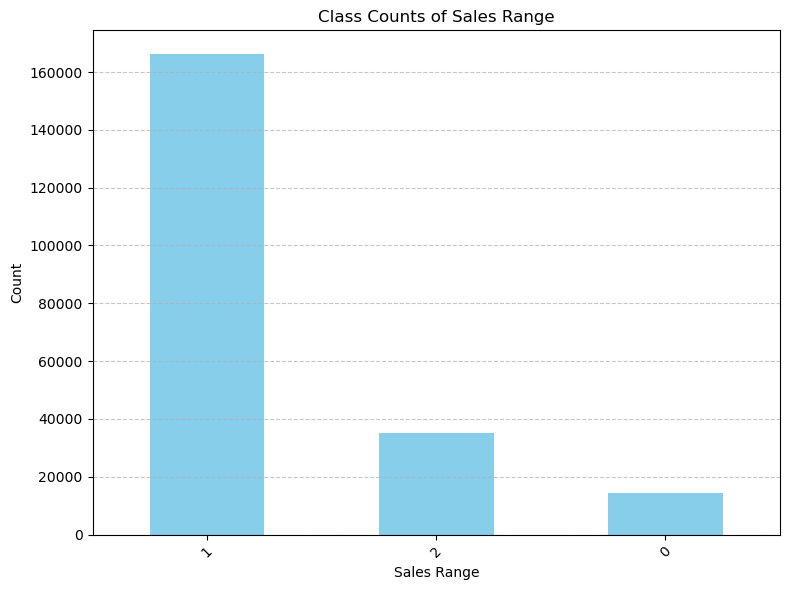

In [136]:
class_counts = filtered_data['sales_range'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Counts of Sales Range')
plt.xlabel('Sales Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [137]:
#sample of low sales
df_0 = filtered_data[filtered_data['sales_range'] == 1].sample(n=14354, random_state=42)

#sample of medium sales
df_1 = filtered_data[filtered_data['sales_range'] == 0].sample(n=14354, random_state=42)

#sample of high sales
df_2 = filtered_data[filtered_data['sales_range'] == 2].sample(n=14354, random_state=42)

#combine the samples
df_sampled = pd.concat([df_0, df_1,df_2])

#shuffle the samples
df_sampled = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

#find its shape
print(df_sampled.shape)

(43062, 115)


In [138]:
df_sampled.head()

,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,...,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,month_numeric,sales_range
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,5,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,3,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,3,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,4,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,11,2


In [139]:
df_sampled.to_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/SVM_prep_data_sampled.csv')

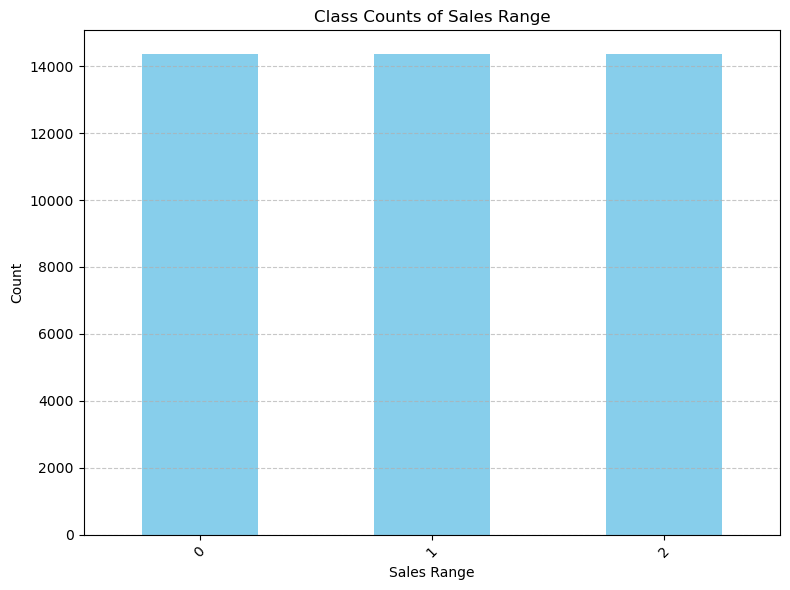

In [91]:
class_counts_1 = df_sampled['sales_range'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
class_counts_1.plot(kind='bar', color='skyblue')
plt.title('Class Counts of Sales Range')
plt.xlabel('Sales Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [92]:
#Separate  X and Y
X = df_sampled.drop("sales_range", axis = 1)
y = df_sampled['sales_range']


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear kernel

In [94]:
# Initialize SVM classifier with a linear kernel
svm_classifier_1 = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier_1.fit(X_train, y_train)

# Predictions on the testing set
y_pred_1 = svm_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_1))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2890
           1       0.95      0.87      0.91      2885
           2       0.77      0.82      0.80      2838

    accuracy                           0.86      8613
   macro avg       0.86      0.86      0.86      8613
weighted avg       0.86      0.86      0.86      8613



### Hyperparameter tuning

In [95]:
# Initialize SVM classifier with a linear kernel
svm_classifier_2 = SVC(kernel='linear', random_state=42, C=10)

# Train the SVM classifier
svm_classifier_2.fit(X_train, y_train)

# Predictions on the testing set
y_pred_2 = svm_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_2))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2890
           1       0.95      0.87      0.91      2885
           2       0.77      0.82      0.80      2838

    accuracy                           0.86      8613
   macro avg       0.86      0.86      0.86      8613
weighted avg       0.86      0.86      0.86      8613



In [96]:
# Compute accuracy score
accuracy_2 = accuracy_score(y_test, y_pred_2)

# Compute precision score
precision_2 = precision_score(y_test, y_pred_2, average='weighted') 

# Compute recall score
recall_2 = recall_score(y_test, y_pred_2, average='weighted')  

# Compute F1-Score
f1_2 = f1_score(y_test, y_pred_2, average='weighted')  

# Compute Confusion Matrix
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)

# Print the evaluation metrics
print("Accuracy:", accuracy_2)
print("Precision:", precision_2)
print("Recall:", recall_2)
print("F1-Score:", f1_2)
print("Confusion Matrix:\n", conf_matrix_2)

Accuracy: 0.8598629977940323
Precision: 0.8645331708728888
Recall: 0.8598629977940323
F1-Score: 0.861276289372581
Confusion Matrix:
 [[2557    0  333]
 [   3 2513  369]
 [ 375  127 2336]]


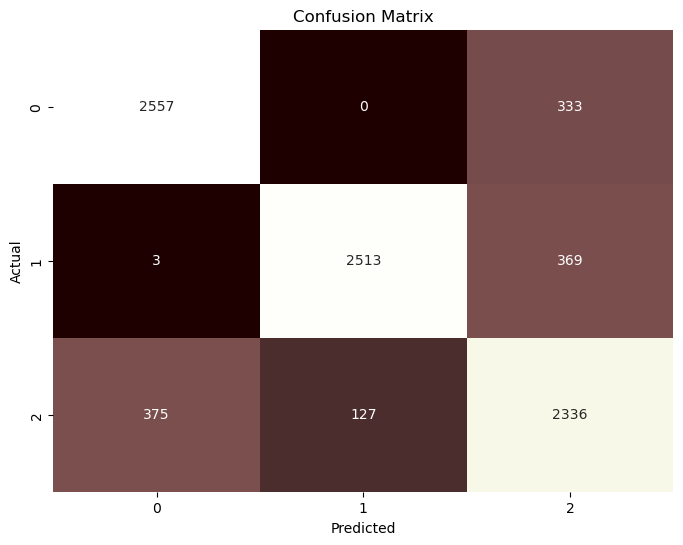

In [97]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## RBF kernel

In [98]:
# Initialize SVM classifier with a linear kernel
svm_classifier_3 = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm_classifier_3.fit(X_train, y_train)

# Predictions on the testing set
y_pred_3 = svm_classifier_3.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_3))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2890
           1       0.97      0.84      0.90      2885
           2       0.76      0.84      0.80      2838

    accuracy                           0.86      8613
   macro avg       0.86      0.86      0.86      8613
weighted avg       0.87      0.86      0.86      8613



### Hyperparameter tuning

In [99]:
# Initialize SVM classifier with a linear kernel
svm_classifier_4 = SVC(kernel='rbf', random_state=42, C=100)

# Train the SVM classifier
svm_classifier_4.fit(X_train, y_train)

# Predictions on the testing set
y_pred_4 = svm_classifier_4.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_4))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2890
           1       0.96      0.91      0.94      2885
           2       0.85      0.86      0.85      2838

    accuracy                           0.90      8613
   macro avg       0.90      0.90      0.90      8613
weighted avg       0.90      0.90      0.90      8613



In [100]:
# Compute accuracy score
accuracy_4 = accuracy_score(y_test, y_pred_4)

# Compute precision score
precision_4 = precision_score(y_test, y_pred_4, average='weighted') 

# Compute recall score
recall_4 = recall_score(y_test, y_pred_4, average='weighted')  

# Compute F1-Score
f1_4 = f1_score(y_test, y_pred_4, average='weighted')  

# Compute Confusion Matrix
conf_matrix_4 = confusion_matrix(y_test, y_pred_4)

# Print the evaluation metrics
print("Accuracy:", accuracy_4)
print("Precision:", precision_4)
print("Recall:", recall_4)
print("F1-Score:", f1_4)
print("Confusion Matrix:\n", conf_matrix_4)

Accuracy: 0.9023569023569024
Precision: 0.9036834760428335
Recall: 0.9023569023569024
F1-Score: 0.902664177734295
Confusion Matrix:
 [[2706    0  184]
 [   2 2626  257]
 [ 292  106 2440]]


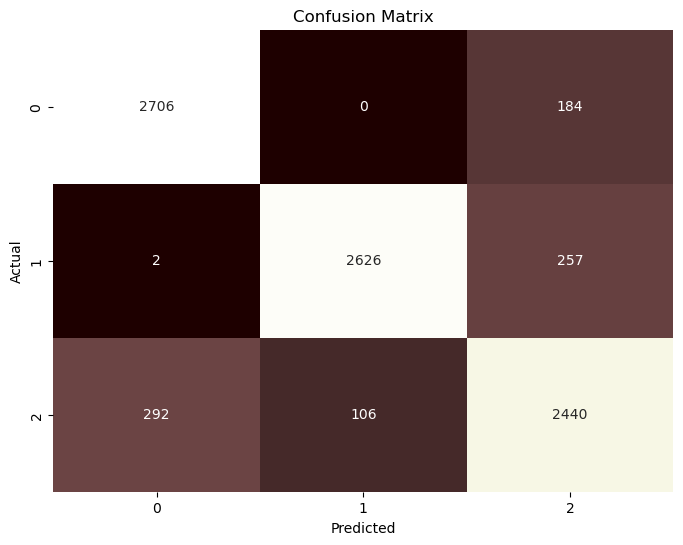

In [101]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_4, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Polynomial kernel

In [102]:
# Initialize SVM classifier with a linear kernel
svm_classifier_5 = SVC(kernel='poly', random_state=42)

# Train the SVM classifier
svm_classifier_5.fit(X_train, y_train)

# Predictions on the testing set
y_pred_5 = svm_classifier_5.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_5))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.66      0.76      2890
           1       0.84      0.89      0.86      2885
           2       0.66      0.79      0.72      2838

    accuracy                           0.78      8613
   macro avg       0.79      0.78      0.78      8613
weighted avg       0.80      0.78      0.78      8613



### Hyperparameter tuning

In [103]:
# Initialize SVM classifier with a linear kernel
svm_classifier_6 = SVC(kernel='poly', random_state=42, C=1000)

# Train the SVM classifier
svm_classifier_6.fit(X_train, y_train)

# Predictions on the testing set
y_pred_6 = svm_classifier_6.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_6))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2890
           1       0.95      0.91      0.93      2885
           2       0.83      0.84      0.84      2838

    accuracy                           0.89      8613
   macro avg       0.89      0.89      0.89      8613
weighted avg       0.89      0.89      0.89      8613



In [104]:
# Compute accuracy score
accuracy_6 = accuracy_score(y_test, y_pred_6)

# Compute precision score
precision_6 = precision_score(y_test, y_pred_6, average='weighted') 

# Compute recall score
recall_6 = recall_score(y_test, y_pred_6, average='weighted')  

# Compute F1-Score
f1_6 = f1_score(y_test, y_pred_6, average='weighted')  

# Compute Confusion Matrix
conf_matrix_6 = confusion_matrix(y_test, y_pred_6)

# Print the evaluation metrics
print("Accuracy:", accuracy_6)
print("Precision:", precision_6)
print("Recall:", recall_6)
print("F1-Score:", f1_6)
print("Confusion Matrix:\n", conf_matrix_6)

Accuracy: 0.8929525136421688
Precision: 0.8939865408995247
Recall: 0.8929525136421688
F1-Score: 0.8932208793285139
Confusion Matrix:
 [[2674    0  216]
 [   4 2623  258]
 [ 309  135 2394]]


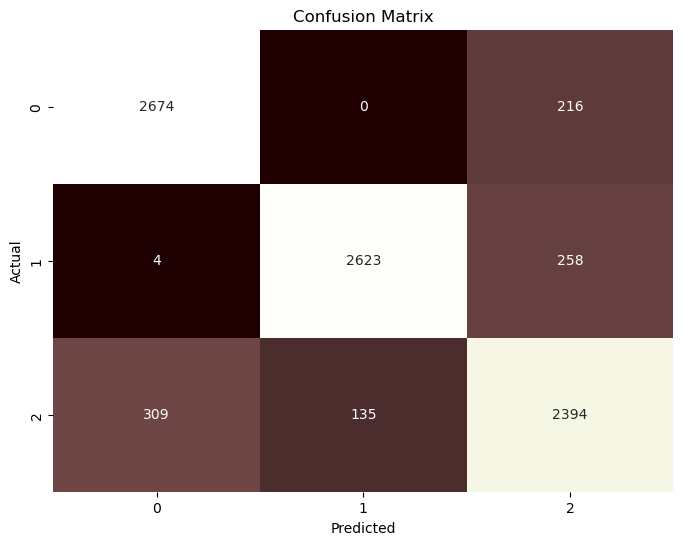

In [105]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_6, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Sigmoid kernel

In [106]:
# Initialize SVM classifier with a linear kernel
svm_classifier_7 = SVC(kernel='sigmoid', random_state=42)

# Train the SVM classifier
svm_classifier_7.fit(X_train, y_train)

# Predictions on the testing set
y_pred_7 = svm_classifier_7.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_7))

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.49      0.39      2890
           1       0.33      0.48      0.39      2885
           2       0.68      0.02      0.03      2838

    accuracy                           0.33      8613
   macro avg       0.44      0.33      0.27      8613
weighted avg       0.44      0.33      0.27      8613



### Hyperparameter tuning

In [107]:
# Initialize SVM classifier with a linear kernel
svm_classifier_8 = SVC(kernel='sigmoid', random_state=42, C=100)

# Train the SVM classifier
svm_classifier_8.fit(X_train, y_train)

# Predictions on the testing set
y_pred_8 = svm_classifier_8.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_8))

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.49      0.39      2890
           1       0.33      0.48      0.39      2885
           2       0.66      0.02      0.03      2838

    accuracy                           0.33      8613
   macro avg       0.44      0.33      0.27      8613
weighted avg       0.44      0.33      0.27      8613



In [108]:
# Compute accuracy score
accuracy_8 = accuracy_score(y_test, y_pred_8)

# Compute precision score
precision_8 = precision_score(y_test, y_pred_8, average='weighted') 

# Compute recall score
recall_8 = recall_score(y_test, y_pred_8, average='weighted')  

# Compute F1-Score
f1_8 = f1_score(y_test, y_pred_8, average='weighted')  

# Compute Confusion Matrix
conf_matrix_8 = confusion_matrix(y_test, y_pred_8)

# Print the evaluation metrics
print("Accuracy:", accuracy_8)
print("Precision:", precision_8)
print("Recall:", recall_8)
print("F1-Score:", f1_8)
print("Confusion Matrix:\n", conf_matrix_8)

Accuracy: 0.32903750145129457
Precision: 0.43690084065281537
Recall: 0.32903750145129457
F1-Score: 0.2710662096932942
Confusion Matrix:
 [[1407 1463   20]
 [1499 1384    2]
 [1400 1395   43]]


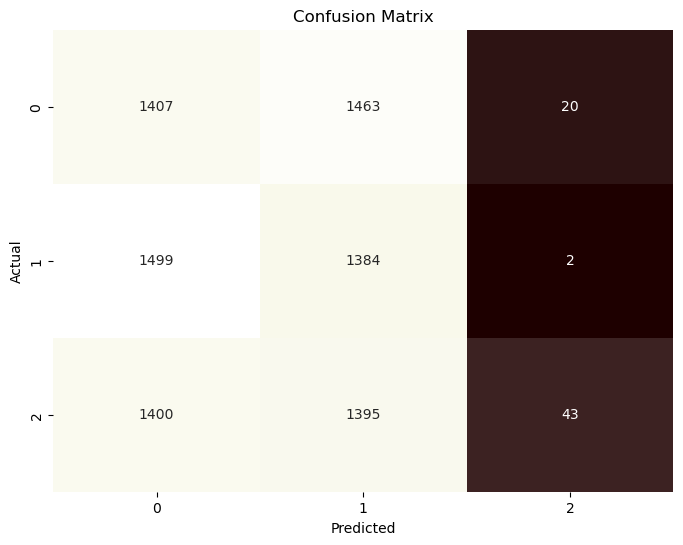

In [109]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_8, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

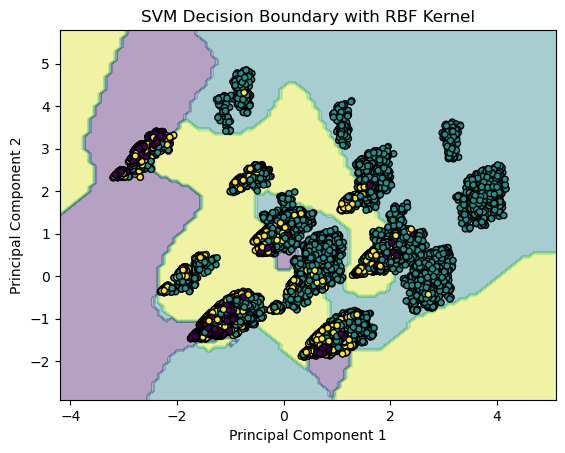

In [117]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit SVM with RBF kernel
svm_classifier_9 = SVC(kernel='rbf', C=100)
svm_classifier_9.fit(X_pca, y)

# Create a meshgrid to plot decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm_classifier_9.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with RBF Kernel')
plt.show()


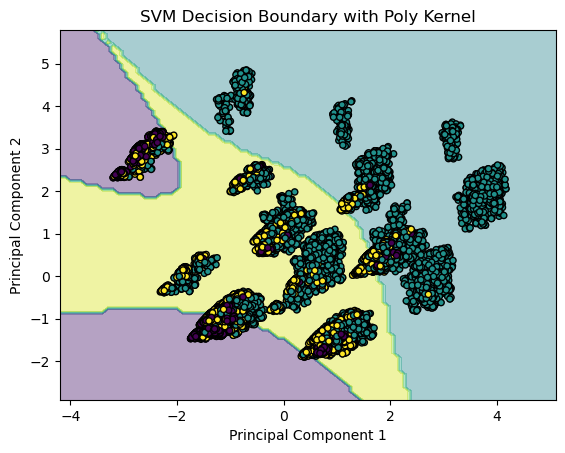

In [121]:
# Fit SVM with ploy kernel
svm_classifier_10 = SVC(kernel='poly', C=1000)
svm_classifier_10.fit(X_pca, y)

# Create a meshgrid to plot decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm_classifier_10.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with Poly Kernel')
plt.show()